## Cosine Similarity

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# Step 2: Sample Corpus (4 Shakespeare Plays – Simplified for Demo)
corpus = {
    "Macbeth": """
        Tomorrow, and tomorrow, and tomorrow,
        Creeps in this petty pace from day to day
        Life's but a walking shadow, a poor player
        That struts and frets his hour upon the stage
        And then is heard no more. It is a tale
        Told by an idiot, full of sound and fury,
        Signifying nothing.
    """,
    "Twelfth Night": """
        If music be the food of love, play on,
        Give me excess of it, that surfeiting,
        The appetite may sicken, and so die.
        That strain again, it had a dying fall;
        O, it came o'er my ear like the sweet sound
        That breathes upon a bank of violets,
        Stealing and giving odour!
    """,
    "Henry V": """
        Once more unto the breach, dear friends, once more;
        Or close the wall up with our English dead.
        In peace there's nothing so becomes a man
        As modest stillness and humility;
        But when the blast of war blows in our ears,
        Then imitate the action of the tiger:
        Stiffen the sinews, summon up the blood.
    """,
    "Julius Caesar": """
        Friends, Romans, countrymen, lend me your ears;
        I come to bury Caesar, not to praise him.
        The evil that men do lives after them;
        The good is oft interred with their bones;
        So let it be with Caesar.
        The noble Brutus hath told you Caesar was ambitious.
    """
}


In [3]:
from collections import defaultdict
import re

def tokenize(text):
  text = text.lower()
  tokens = re.findall(r'\b[a-z]{3,}\b', text)
  return tokens

tokenized_corpus = {doc: tokenize(text) for doc, text in corpus.items()}


In [4]:
# Step 4: Build the Vocabulary (Set of All Words)
vocab = set()
for tokens in tokenized_corpus.values():
    vocab.update(tokens)

vocab = sorted(vocab)
print(f"Total vocabulary size: {len(vocab)}")


Total vocabulary size: 116


In [5]:
# Step 5: Build the Term-Document Matrix (Count Vectors)
doc_names = list(tokenized_corpus.keys())
term_doc_matrix = np.zeros((len(doc_names), len(vocab)))

word_to_idx = {word: i for i, word in enumerate(vocab)}

for doc_idx, doc in enumerate(doc_names):
    for word in tokenized_corpus[doc]:
        if word in word_to_idx:
            term_doc_matrix[doc_idx][word_to_idx[word]] += 1

term_doc_df = pd.DataFrame(term_doc_matrix, index=doc_names, columns=vocab)
term_doc_df.head()


,action,after,again,ambitious,and,appetite,bank,becomes,blast,blood,...,upon,violets,walking,wall,war,was,when,with,you,your
Macbeth,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twelfth Night,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Henry V,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
Julius Caesar,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0


Cosine Similarity Matrix:


,Macbeth,Twelfth Night,Henry V,Julius Caesar
Macbeth,1.000000,0.308697,0.213773,0.084084
Twelfth Night,0.308697,1.000000,0.337288,0.235339
Henry V,0.213773,0.337288,1.000000,0.359498
Julius Caesar,0.084084,0.235339,0.359498,1.000000


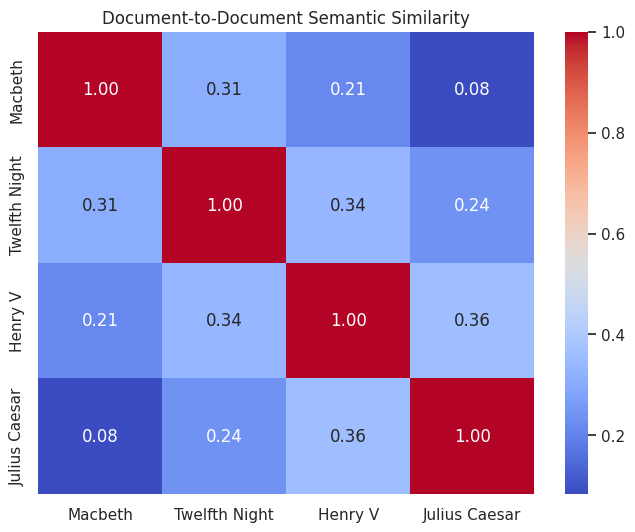

In [6]:
# Step 6: Compute Cosine Similarity Between Document Vectors
cos_sim = cosine_similarity(term_doc_matrix)
cos_sim_df = pd.DataFrame(cos_sim, index=doc_names, columns=doc_names)

print("Cosine Similarity Matrix:")
display(cos_sim_df)

# Optional: Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Document-to-Document Semantic Similarity")
plt.show()


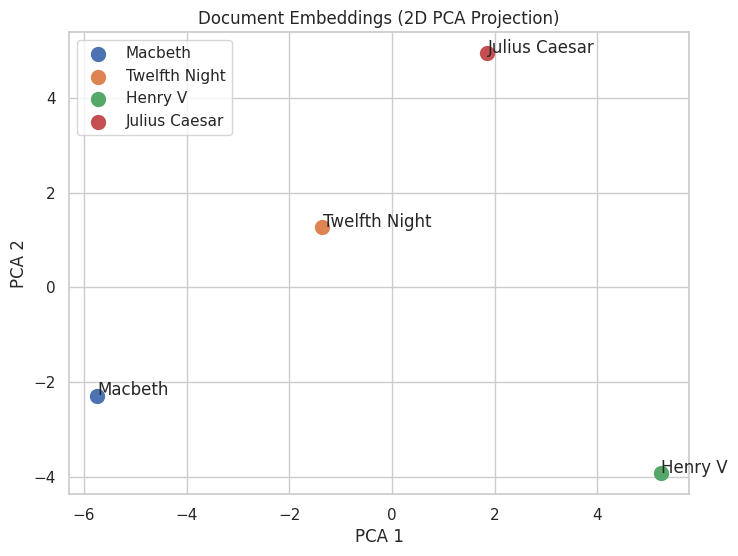

In [7]:
# Step 7: Reduce Dimensions with PCA and Visualize in 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(term_doc_matrix)

plt.figure(figsize=(8, 6))
for i, name in enumerate(doc_names):
    x, y = reduced[i]
    plt.scatter(x, y, label=name, s=100)
    plt.text(x + 0.01, y + 0.01, name, fontsize=12)

plt.title("Document Embeddings (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()
